# Now lets learn using a larger model

- in general we are going to be dealing with larger datasets 
- lets use the public medical cost data set     
- import the medical cost data set from kaggle   


In [2]:
import tensorflow as tf 
import numpy as np
import keras   
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn



In [5]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


-Now lets define the independent and independent variables:
- independent variable = (age, sex, bmi, children smoker region)
- dependent variable = charges 
- teh first step we need to do is get the data ready 
- do we need to pass in different data types for different layers or differnet neurons 
- notice we whave numerical and non numerical data types ( object) in the data 
- we need to convert these data types into float32 

In [6]:
# lets check the data type of the different columns 
insurance["smoker"] , insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [8]:
# we need to encode the non numerical varibales into a numerical form. 
# lets use one-hot encoding to encode this    
# this has to be done for all the 
# sex_df = pd.DataFrame(insurance["sex"])
# pd.get_dummies(df['sex'], prefix= ['male', 'female'])
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [13]:
# create x and y values 
# first lets make X 
# since X is the training set of data we are going to need to seperate 

X = insurance_one_hot.drop("charges", axis = 1) # the .drop funciton enables you to remove one of the columns 
y = insurance_one_hot["charges"] # just getting charges by itself as the y variable
X.head()
# we ahve dropped charges because it is our dependent variable so we are going to need 

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [14]:
# lets view y 
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [17]:
# not lets create a training and test sets 
# if we have a feature matrix with labled vectors we can use the scikitlearn trainign test split 
from sklearn.model_selection import train_test_split 
# this is where we are going to do the 80, 20 split 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.20, random_state = 42) # if we dont use random state then teh split will be random so we ahve to set the split 
len(X), len(X_train), len(X_test)
# now we have a 80/20 split 
# the number origionally in X, then the number that has been 


(1338, 1070, 268)

In [18]:
# now lets see what the samples of the sets are like 
X_train
# notice how all teh indexes are randomly shuffled 

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [19]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0,1,0,1,0,0,1,0
575,58,27.170,0,1,0,1,0,0,1,0,0
535,38,28.025,1,0,1,1,0,1,0,0,0
543,54,47.410,0,1,0,0,1,0,0,1,0


In [43]:
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
insurance_model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
insurance_model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): insurance_model.fit(X_train, y_train, epochs=100) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
 1/34 [..............................] - ETA: 0s - loss: 7614.6641 - mae: 7614.6641

2022-07-03 02:17:54.299996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 3ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0229 - mae: 7792.0229
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3877 - mae: 7748.3877
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3950 - mae: 7595.3950
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9839 - mae: 7589.9839
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5596 - mae: 7698.5596
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7783 - mae: 7496.7783
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 7769.7314 - mae: 7769.7314
Epoch 12/100
34/34 [==============================] - 0s 2ms/step - loss: 7706.9053 - mae: 7706.9053
Epoch 13/

In [21]:
insurance_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11, 10)            20        
                                                                 
 dense_1 (Dense)             (None, 11, 1)             11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [22]:
insurance_model.evaluate(X_test,y_test)

2022-07-02 21:13:22.197566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 8ms/step - loss: 8921.2812 - mae: 8921.2812


[8921.28125, 8921.28125]

## Improving the model


In [47]:
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
insurance_model2= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
insurance_model2.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): history1 = insurance_model2.fit(X_train, y_train, epochs=100)# we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
20/34 [================>.............] - ETA: 0s - loss: 12595.3262 - mae: 12595.3262

2022-07-03 02:22:16.079833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae: 7409.0811
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 7390.8042 - mae: 7390.8042
Ep

In [58]:
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using the sequenctial API
insurance_model3= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
insurance_model3.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): history2 = insurance_model3.fit(X_train, y_train, epochs=200, verbose=1) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
 1/34 [..............................] - ETA: 0s - loss: 12323.3457 - mae: 12323.3457

2022-07-04 20:41:36.867616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 2ms/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae: 7409.0811
Epoch 11/200
34/34 [==============================] - 0s 2ms/step - loss: 7390.8042 - mae: 7390.8042
Epoch 12/200
34/34 [==============================] - 0s 3ms/step - loss: 7368.9170 - mae: 7368.9170
Epo

In [55]:
# now lets evaluate atainst the test data
insurance_model3.evaluate(X_test,y_test)

2022-07-04 20:36:05.040240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 6ms/step - loss: 3488.7856 - mae: 3488.7856


[3488.78564453125, 3488.78564453125]

Text(0.5, 0, 'epochs')

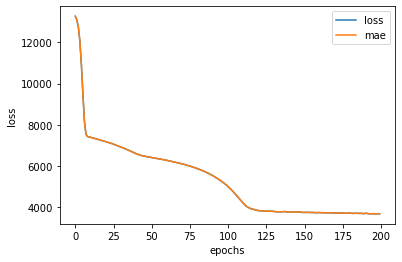

In [56]:
# now lets look at the loss rate cureve , plot the loss curve hwich is also known as a loss curve 
pd.DataFrame(history2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

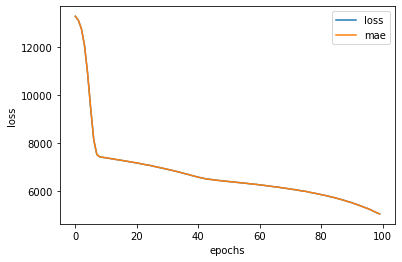

In [57]:
pd.DataFrame(history1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# how long should you train for?
# depends on the problem that youre working on 
# in general we are able to use the early stopping callback to determine this
# early stopping call back whicih is a tf compoenent that will stop training once it stops improving a ceratin metric 

## Normalizataion
Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. Normalization is also required for some algorithms to model the data correctly.



<AxesSubplot:ylabel='Frequency'>

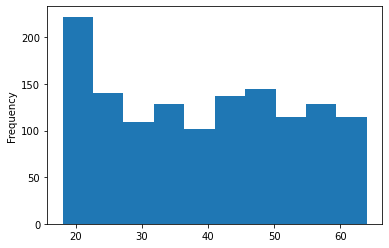

In [59]:
X["age"].plot(kind = "hist")


<AxesSubplot:ylabel='Frequency'>

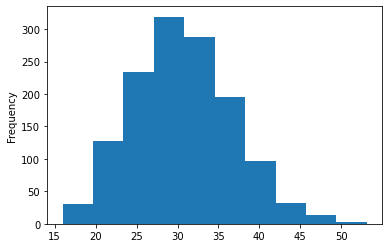

In [61]:
X["bmi"].plot(kind = "hist")

In [63]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## Feature scaling
- There are 2 types of scaling that are used in machine learning: 
- scale (normalization)- converts all values to a values between 0 and 1 and prserves the origional distribution 
